In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

Text(0.5, 1.0, 'sales vs newspaper')

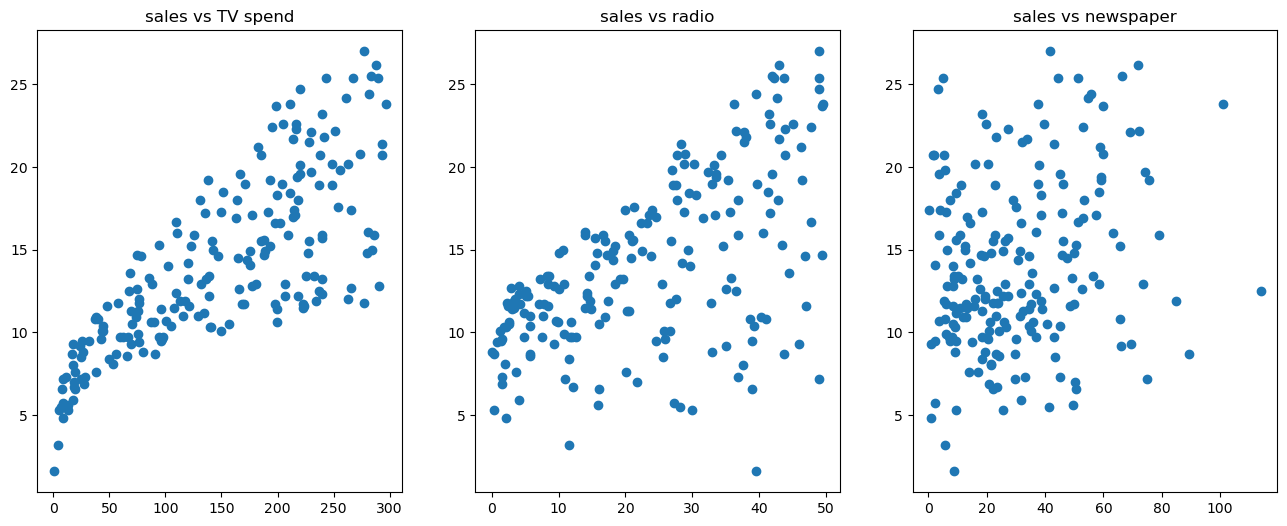

In [4]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o' )
axes[0].set_title('sales vs TV spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('sales vs radio')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('sales vs newspaper')

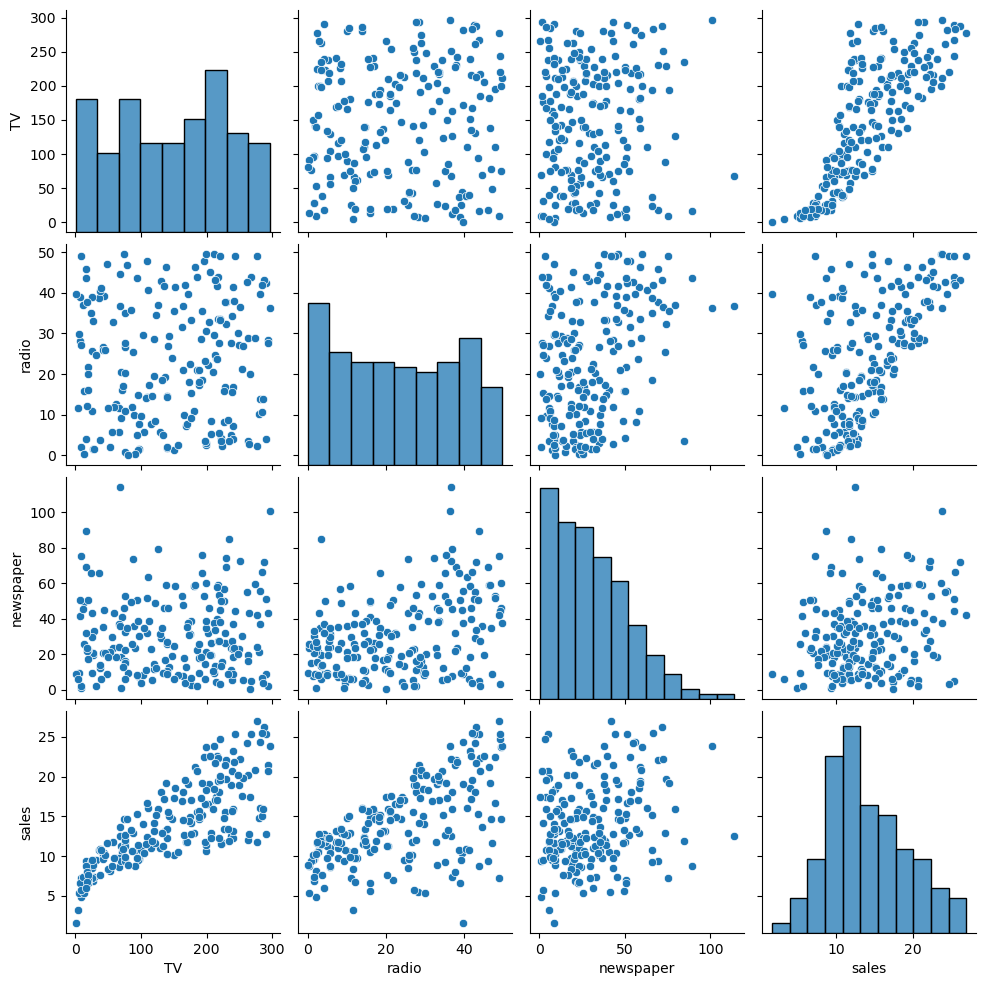

In [5]:
sns.pairplot(df)

## Creating features and y label

In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

In [7]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test = train_test_split(X,y,test_size= 1/3,random_state=100)

In [8]:
X_train

,TV,radio,newspaper
88,88.3,25.5,73.4
119,19.4,16.0,22.3
110,225.8,8.2,56.5
57,136.2,19.2,16.6
44,25.1,25.7,43.3
...,...,...,...
87,110.7,40.6,63.2
103,187.9,17.2,17.9
67,139.3,14.5,10.2
24,62.3,12.6,18.3


In [9]:
y_train

88     12.9
119     6.6
110    13.4
57     13.2
44      8.5
       ... 
87     16.0
103    14.7
67     13.4
24      9.7
8       4.8
Name: sales, Length: 133, dtype: float64

In [10]:
y_test.shape

(67,)

## Create Model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()  

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([10.5666586 , 19.91532669, 16.87316142, 19.18103127, 20.88726447,
       13.10713912, 11.77420501, 12.27979163, 20.53574233, 20.88631298,
       10.71381372, 19.59315343,  6.39912647, 15.16350622,  8.93452289,
        7.8408686 , 16.12743853, 12.02956883, 16.99154034, 11.24209542,
       16.89946856,  9.7484549 , 20.79227655, 17.17307004, 15.09416423,
       21.84737545, 19.18593873, 10.03210005, 19.26453829, 14.76806994,
       14.28501722,  7.4711441 ,  9.98642141, 14.73241296,  7.15110394,
       13.51500489,  7.48200416, 11.66947614, 13.43927619, 15.26990574,
       17.20667701, 13.49409231, 14.31093735, 13.73069707, 11.81193899,
        8.75560315, 12.13737437, 19.16095561,  9.06398029,  5.09832116,
       16.20399854, 18.09035978, 12.91729775, 16.7816995 , 17.78516384,
       12.2798573 ,  4.33199098, 11.12733589, 16.05464021, 13.52889194,
       17.01241345, 17.62386929, 20.52388045, 14.67660041,  9.67779336,
        6.28872915, 14.52008415])

In [16]:
y_test

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
       ... 
185    22.6
26     15.0
90     11.2
127     8.8
81     12.3
Name: sales, Length: 67, dtype: float64

# Calculate performance of Test Set

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [18]:
df['sales'].mean()

14.022500000000003

In [19]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

1.1208858059440137

In [20]:
MSE = mean_squared_error(y_test,y_pred)
MSE

1.991488366983417

In [21]:
RMSE = np.sqrt(MSE)
RMSE

1.411201037054401

<AxesSubplot:xlabel='sales', ylabel='Count'>

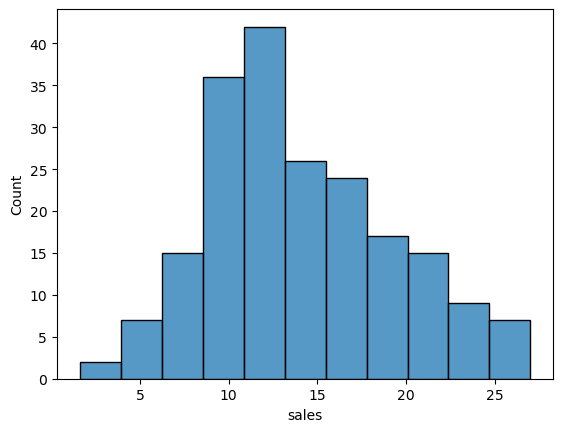

In [22]:
sns.histplot(data=df,x='sales')

## Plotting Residuals

In [23]:
test_residuals = y_test - y_pred

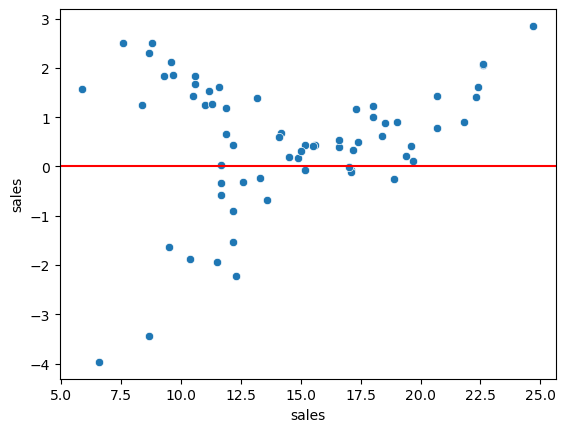

In [24]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, c='r')

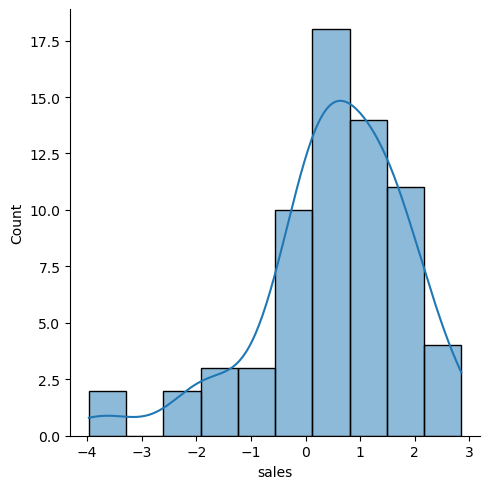

In [25]:
sns.displot(test_residuals,kde=True)

## Retraining Model on Full Data

In [26]:
final_model = LinearRegression()

In [27]:
final_model.fit(X,y)

LinearRegression()

In [28]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'sales vs newspaper')

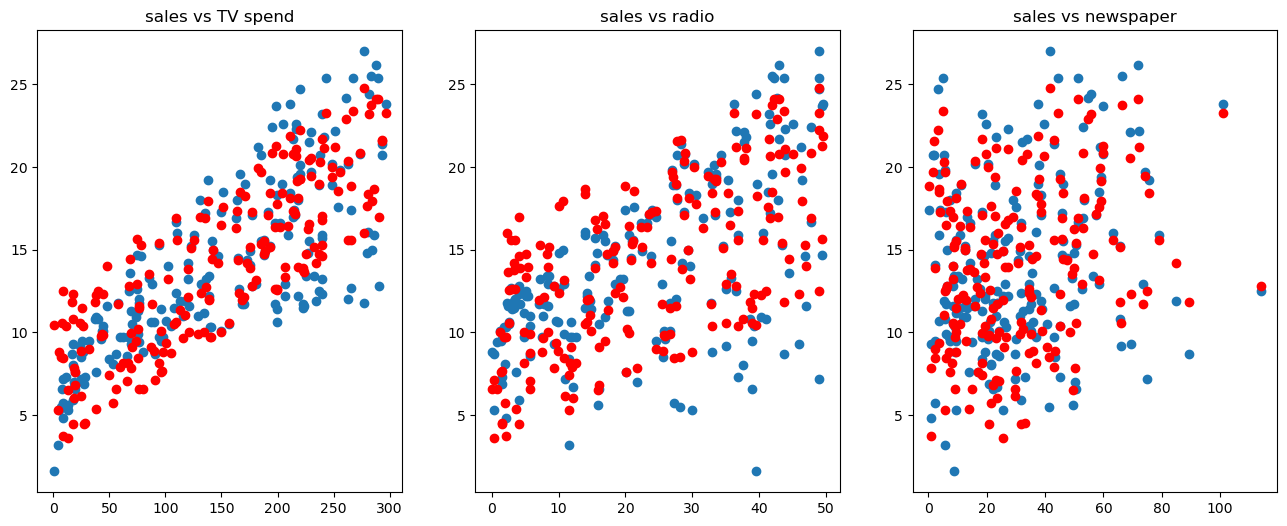

In [29]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o' )
axes[0].plot(df['TV'],y_hat,'o' , color='red')
axes[0].set_title('sales vs TV spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o', color='red')
axes[1].set_title('sales vs radio')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o', color='red')
axes[2].set_title('sales vs newspaper')

In [30]:
res = y_hat-y

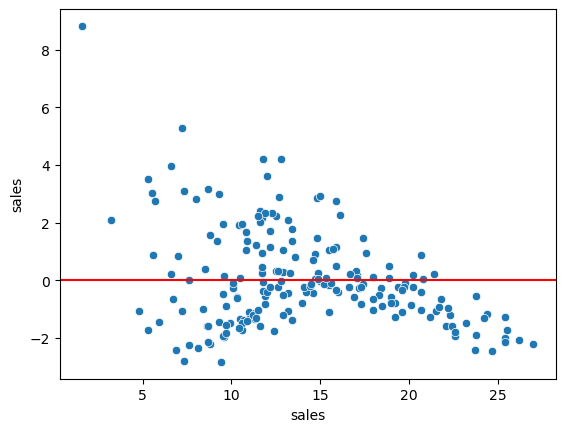

In [31]:
sns.scatterplot(x=y,y=res)
plt.axhline(y=0, c='r')

## Coefficients

In [32]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [33]:
##Assignment: 
##1. Create dataframe using y_pred and y_test. Compare the too values
##2. Scatterplot: true_y - predicted_y vs true_y for anscmobe's quartet
## 3. Make sense of these 3 values above

###interpetation of co -efficients
1 Holding all oher feature fixed, a 1 unit (1000 dollars) increas in Tv sped is assciated with  increase in 0.045 
"sales units ",in this case 45 units
2 Holding all other frature fixed 

In [35]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


   precting new data

In [36]:
new_spend = [[149,22,9],[200,12,98]]

In [37]:
final_model.predict(new_spend)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.89614448, 14.25250435])

Saving and Loding a model

In [38]:
from joblib import dump,load

In [39]:
dump(final_model,'full_sales_model.joblib')

['full_sales_model.joblib']

In [40]:
from joblib import load
final_model = load
final_model = load("full_sales_model.joblib")
final_model.predict(new_spend)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.89614448, 14.25250435])